In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

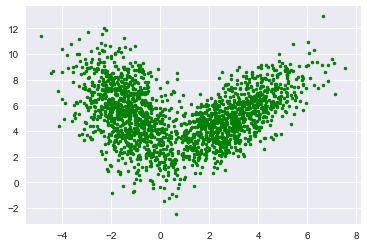

In [115]:
mu = np.array([3,5])
a = 1/np.sqrt(2)
_sig2 = np.array([[2,2],[2,4]])
data = np.random.multivariate_normal(mu,_sig2,1000)@np.array([[a,a],[-a,a]])
data = np.append(data,np.random.multivariate_normal(mu,_sig2,1000),axis = 0)
plt.plot(data[:,0],data[:,1],"g.")
plt.show()

In [116]:
data

array([[-2.02308518,  5.03403542],
       [-0.86621922,  8.83868475],
       [-0.53099324,  3.45207355],
       ..., 
       [ 3.82575988,  4.84840222],
       [ 1.46858437,  5.33662976],
       [ 5.17441469,  8.38130788]])

In [117]:
def PCA(data,k):
    D = len(data[0])
    N = len(data)
    S = np.cov(data.T)
    w,v = np.linalg.eig(S)

    eigen_id = np.argsort(w)[::-1]
    eigen_value = w[eigen_id]
    eigen_vector = v[:,eigen_id]
    data_ = data@eigen_vector[:k].T
    return eigen_value[:k],eigen_vector[:k],data_

In [118]:
w,v,PCAdata = PCA(data,2)

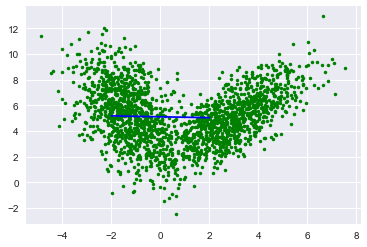

In [119]:
plt.plot(data[:,0],data[:,1],"g.")
x = np.linspace(-2,2,100)
y = (v[0,1]/v[0,0])*x + (mu[1] - (v[0,1]/v[0,0])*mu[0])
plt.plot(x,y,'b-')
#y2 = (v[1,1]/v[1,0])*x + (mu[1] - (v[1,1]/v[1,0])*mu[0])
#plt.plot(x,y2,'b-')
plt.show()

In [120]:
def PPCA_ml(data,k):
    D = len(data[0])
    N = len(data)
    S = np.cov(data.T)
    l,v = np.linalg.eig(S)
    eigen_id = np.argsort(l)[::-1]
    l = l[eigen_id]
    v = v[:,eigen_id]
    mu_ = np.average(data,axis = 0)
    sig2_ = np.sum(l[k:])/(D-k)
    sig2_ = 0.1
    Um = v[:k]
    Lm = np.diag(l[:k])
    R = np.identity(k)#任意の直交行列
    v = Um.T@((Lm - sig2_*np.identity(k))**(1/2))@R
    data_ = data@v
    return v.T,data_

In [121]:
v_ml,PPCA_mldata = PPCA_ml(data,2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [122]:
v_ml

array([[ 2.44911954, -0.08521367],
       [ 0.07574246,  2.17690804]])

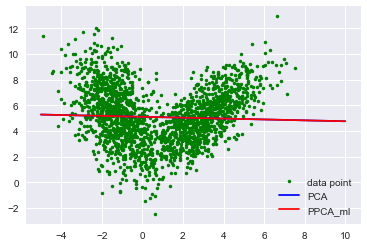

In [125]:
plt.plot(data[:,0],data[:,1],"g.",label = "data point")
x = np.linspace(-5,10,100)
y = (v[0,1]/v[0,0])*x + (mu[1] - (v[0,1]/v[0,0])*mu[0])
plt.plot(x,y,'b-', label = 'PCA')
#y2 = (v[1,1]/v[1,0])*x + (mu[1] - (v[1,1]/v[1,0])*mu[0])
#plt.plot(x,y2,'b-', label = 'PCA')

y = (v_ml[0,1]/v_ml[0,0])*x + (mu[1] - (v_ml[0,1]/v_ml[0,0])*mu[0])
plt.plot(x,y,'r-', label = 'PPCA_ml')
#y2 = (v_ml[1,1]/v_ml[1,0])*x + (mu[1] - (v_ml[1,1]/v_ml[1,0])*mu[0])
#plt.plot(x,y2,'r-', label = 'PPCA_ml')
plt.legend()
plt.show()

In [126]:
def EM_pPCA(data,k,iteration):
    D = len(data[0])
    N = len(data)
    # initialize W sig
    W = np.ones((D,k))
    sigma2 = 1
    mu = np.average(data,axis = 0)
    
    for _iter in range(iteration):
        # E step
        M = W.T@W + sigma2*np.identity(k)
        Ez = (np.linalg.inv(M)@W.T@(data - mu).T).reshape(1,k,N)
        Ezz = np.array([sigma2 * np.linalg.inv(M) + Ez[:,:,k] * Ez[:,:,k].T for k in range(N)])
        
        # M step
        A = np.array([(data[i] - mu) * Ez[:,:,i].T for i in range(N)])
        Wnew = np.sum(A,axis = 0).T @ np.linalg.inv(np.sum(Ezz,axis=0))
        sig = np.array([np.linalg.norm(data[i] - mu) ** 2 - 2 * Ez[:,:,i]@Wnew.T@(data[i] - mu) + np.trace(Ezz[i]@Wnew.T@Wnew) for i in range(N)])
        signew = np.sum(sig)/(N*D)
        
        W = Wnew
        sigma2 = signew
    
    return W.T,sigma2

In [127]:
w,v,PCAdata = PCA(data,2)
v_ml,PPCA_mldata = PPCA_ml(data,2)
v_em,emsigma2 =EM_pPCA(data,2,100)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [128]:
print(v_ml)
print(v_em)
print(v)

[[ 2.44911954 -0.08521367]
 [ 0.07574246  2.17690804]]
[[ 0.79329323  0.02760152]
 [ 0.79329323  0.02760152]]
[[ 0.99939525 -0.03477255]
 [ 0.03477255  0.99939525]]


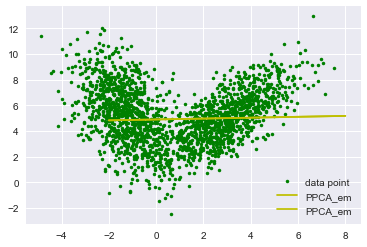

In [129]:
plt.plot(data[:,0],data[:,1],"g.",label = "data point")
x = np.linspace(-2,8,100)
#y = (v[0,1]/v[0,0])*x + (mu[1] - (v[0,1]/v[0,0])*mu[0])
#plt.plot(x,y,'b-', label = 'PCA')
#y2 = (v[1,1]/v[1,0])*x + (mu[1] - (v[1,1]/v[1,0])*mu[0])
#plt.plot(x,y2,'b-', label = 'PCA')

#y = (v_ml[0,1]/v_ml[0,0])*x + (mu[1] - (v_ml[0,1]/v_ml[0,0])*mu[0])
#plt.plot(x,y,'r-', label = 'PPCA_ml')
#y2 = (v_ml[1,1]/v_ml[1,0])*x + (mu[1] - (v_ml[1,1]/v_ml[1,0])*mu[0])
#plt.plot(x,y2,'r-', label = 'PPCA_ml')

y = (v_em[0,1]/v_em[0,0])*x + (mu[1] - (v_em[0,1]/v_em[0,0])*mu[0])
plt.plot(x,y,'y-', label = 'PPCA_em')
y2 = (v_em[1,1]/v_em[1,0])*x + (mu[1] - (v_em[1,1]/v_em[1,0])*mu[0])
plt.plot(x,y2,'y-', label = 'PPCA_em')

plt.legend()
plt.show()